In [4]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\SS SAHANA\Downloads\Global_Sales_Project\Data\superstore.csv"
df = pd.read_csv(file_path)

df.head(), df.shape


(          Category         City        Country Customer.ID     Customer.Name  \
 0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
 1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
 2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
 3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
 4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   
 
    Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
 0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
 1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
 2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
 3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
 4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   
 
     Segment                Sh

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [6]:
df.columns = df.columns.str.replace('.', ' ').str.title()


In [7]:
df.isnull().sum()


Category          0
City              0
Country           0
Customer Id       0
Customer Name     0
Discount          0
Market            0
记录数               0
Order Date        0
Order Id          0
Order Priority    0
Product Id        0
Product Name      0
Profit            0
Quantity          0
Region            0
Row Id            0
Sales             0
Segment           0
Ship Date         0
Ship Mode         0
Shipping Cost     0
State             0
Sub Category      0
Year              0
Market2           0
Weeknum           0
dtype: int64

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [9]:
df['Profit Margin'] = np.where(df['Sales'] != 0, df['Profit'] / df['Sales'], 0)
df['Order Month'] = df['Order Date'].dt.month_name()
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

df['Sales Category'] = pd.cut(df['Sales'],
                               bins=[0, 200, 500, df['Sales'].max()],
                               labels=['Low', 'Medium', 'High'])


In [10]:
df[['Sales','Profit','Profit Margin','Order Month','Delivery Time','Sales Category']].head()


,Sales,Profit,Profit Margin,Order Month,Delivery Time,Sales Category
0,19,9.3312,0.491116,January,2,Low
1,19,9.2928,0.489095,January,5,Low
2,21,9.8418,0.468657,August,4,Low
3,111,53.2608,0.479827,August,4,Low
4,6,3.1104,0.518400,September,4,Low


In [11]:
df.to_csv(r"C:\Users\SS SAHANA\Downloads\Global_Sales_Project\Data\cleaned_global_sales.csv", index=False)


In [12]:
df.columns

Index(['Category', 'City', 'Country', 'Customer Id', 'Customer Name',
       'Discount', 'Market', '记录数', 'Order Date', 'Order Id', 'Order Priority',
       'Product Id', 'Product Name', 'Profit', 'Quantity', 'Region', 'Row Id',
       'Sales', 'Segment', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'State',
       'Sub Category', 'Year', 'Market2', 'Weeknum', 'Profit Margin',
       'Order Month', 'Delivery Time', 'Sales Category'],
      dtype='object')

In [13]:
df = df.drop(columns=['记录数'])

In [14]:
df.shape

(51290, 30)

In [15]:
df.columns

Index(['Category', 'City', 'Country', 'Customer Id', 'Customer Name',
       'Discount', 'Market', 'Order Date', 'Order Id', 'Order Priority',
       'Product Id', 'Product Name', 'Profit', 'Quantity', 'Region', 'Row Id',
       'Sales', 'Segment', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'State',
       'Sub Category', 'Year', 'Market2', 'Weeknum', 'Profit Margin',
       'Order Month', 'Delivery Time', 'Sales Category'],
      dtype='object')

In [17]:
for col in df.columns :
    print(col)

Category
City
Country
Customer Id
Customer Name
Discount
Market
Order Date
Order Id
Order Priority
Product Id
Product Name
Profit
Quantity
Region
Row Id
Sales
Segment
Ship Date
Ship Mode
Shipping Cost
State
Sub Category
Year
Market2
Weeknum
Profit Margin
Order Month
Delivery Time
Sales Category


In [18]:
market_sales = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)
market_sales


Market
APAC      3585833
EU        2938139
US        2297354
LATAM     2164687
EMEA       806184
Africa     783776
Canada      66932
Name: Sales, dtype: int64

In [19]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit


Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64

In [20]:
year_sales = df.groupby('Year')['Sales'].sum().sort_values(ascending=False)
year_sales


Year
2014    4300041
2013    3405860
2012    2677493
2011    2259511
Name: Sales, dtype: int64

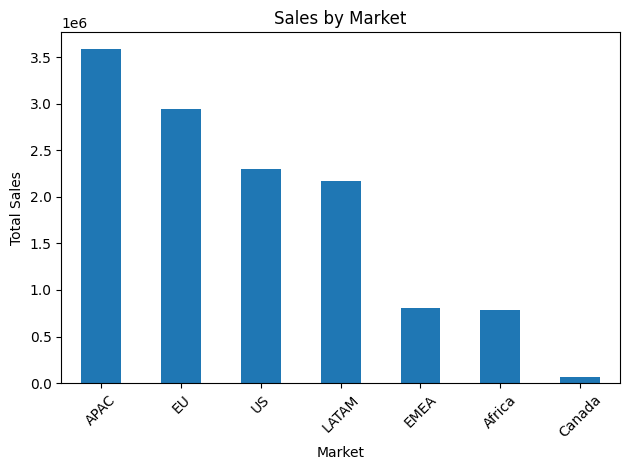

In [26]:
import matplotlib.pyplot as plt

market_sales.plot(kind='bar', title='Sales by Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\SS SAHANA\Downloads\Global_Sales_Project\figures")
plt.show()


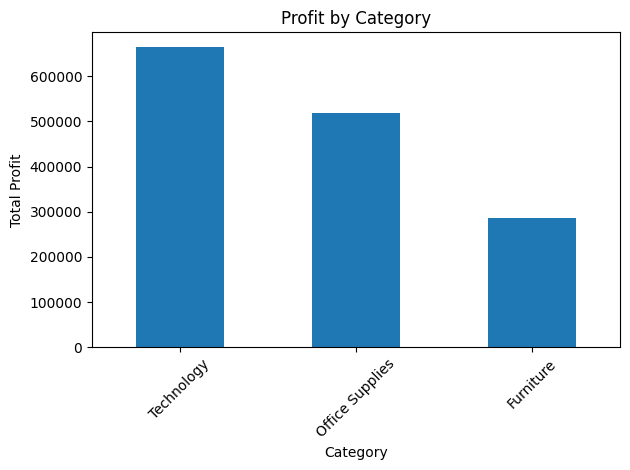

In [24]:
category_profit.plot(kind='bar', title='Profit by Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\SS SAHANA\Downloads\Global_Sales_Project\figures")
plt.show()


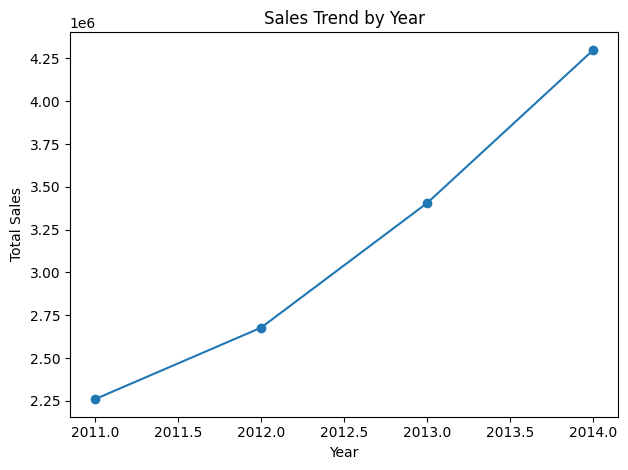

In [25]:
year_sales.plot(kind='line', marker='o', title='Sales Trend by Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\SS SAHANA\Downloads\Global_Sales_Project\figures")
plt.show()
